In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('/Users/huyanshen/Desktop/AI-Medicine/Research/Second/Radiomics-deal.csv')

In [3]:
data

,Moledular,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T1E_lbp-3D-k_firstorder_Kurtosis_y,T1E_lbp-3D-m2_firstorder_TotalEnergy_y,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,...,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,Survival Status,OS (months),Recurrence-label_raw,DFS (month)-raw,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
0,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Classic,Y,Soft,Y,Decease,44,NaN,<44,GTR,N
1,G4,1156.970923,19.111421,5267632.010,-0.007008,1.231558,2.299668,791.758078,102.296212,0.711538,...,DN,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
2,1,1410.749942,20.686464,4868095.300,-0.098837,1.324038,2.593516,889.011346,125.384575,0.727273,...,NaN,Y,Soft,Y,Decease,3,NaN,NaN,GTR,N
3,SHH,951.695279,9.221336,2583605.907,0.053833,1.481915,2.253229,619.413006,80.966523,0.916667,...,DN,N,Mixed,N,Decease,15,Y,<12,GTR,N
4,G4,888.437702,12.365374,4532393.589,-0.099780,1.249149,2.485472,748.279093,78.770574,0.750000,...,Classic,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,G4,1222.864611,8.862181,4397401.007,-0.150120,1.075039,2.456025,936.822916,96.130004,0.700000,...,Classic,Y,Mixed,Y,Alive,1,N,1,GTR,N
225,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,G3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,G4,1374.301383,11.782922,3589443.535,-0.039352,1.232026,2.231122,700.422836,94.934564,0.812500,...,Classic,Y,Soft,Y,Alive,13,N,13,NTR,Y


In [4]:
data = data.dropna(axis=1, how='all')

In [5]:
data

,Moledular,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T1E_lbp-3D-k_firstorder_Kurtosis_y,T1E_lbp-3D-m2_firstorder_TotalEnergy_y,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,...,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,Survival Status,OS (months),Recurrence-label_raw,DFS (month)-raw,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
0,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Classic,Y,Soft,Y,Decease,44,NaN,<44,GTR,N
1,G4,1156.970923,19.111421,5267632.010,-0.007008,1.231558,2.299668,791.758078,102.296212,0.711538,...,DN,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
2,1,1410.749942,20.686464,4868095.300,-0.098837,1.324038,2.593516,889.011346,125.384575,0.727273,...,NaN,Y,Soft,Y,Decease,3,NaN,NaN,GTR,N
3,SHH,951.695279,9.221336,2583605.907,0.053833,1.481915,2.253229,619.413006,80.966523,0.916667,...,DN,N,Mixed,N,Decease,15,Y,<12,GTR,N
4,G4,888.437702,12.365374,4532393.589,-0.099780,1.249149,2.485472,748.279093,78.770574,0.750000,...,Classic,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,G4,1222.864611,8.862181,4397401.007,-0.150120,1.075039,2.456025,936.822916,96.130004,0.700000,...,Classic,Y,Mixed,Y,Alive,1,N,1,GTR,N
225,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,G3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,G4,1374.301383,11.782922,3589443.535,-0.039352,1.232026,2.231122,700.422836,94.934564,0.812500,...,Classic,Y,Soft,Y,Alive,13,N,13,NTR,Y


In [6]:
data = data.dropna(subset=['Leptomeningeal Dissemination'])

In [7]:
data

,Moledular,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T1E_lbp-3D-k_firstorder_Kurtosis_y,T1E_lbp-3D-m2_firstorder_TotalEnergy_y,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,...,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,Survival Status,OS (months),Recurrence-label_raw,DFS (month)-raw,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
0,G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Classic,Y,Soft,Y,Decease,44,NaN,<44,GTR,N
1,G4,1156.970923,19.111421,5267632.010,-0.007008,1.231558,2.299668,791.758078,102.296212,0.711538,...,DN,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
2,1,1410.749942,20.686464,4868095.300,-0.098837,1.324038,2.593516,889.011346,125.384575,0.727273,...,NaN,Y,Soft,Y,Decease,3,NaN,NaN,GTR,N
3,SHH,951.695279,9.221336,2583605.907,0.053833,1.481915,2.253229,619.413006,80.966523,0.916667,...,DN,N,Mixed,N,Decease,15,Y,<12,GTR,N
4,G4,888.437702,12.365374,4532393.589,-0.099780,1.249149,2.485472,748.279093,78.770574,0.750000,...,Classic,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1,907.181866,18.705869,2235640.634,-0.086379,1.320811,2.571143,796.120196,78.907511,0.718750,...,Classic,Y,Mixed,Y,Alive,2,N,2,GTR,N
223,SHH,1037.441797,22.991663,2796430.930,-0.141148,1.449592,2.537309,614.259502,62.795070,0.785714,...,NaN,N,Mixed,N,Alive,2,N,2,GTR,Y
224,G4,1222.864611,8.862181,4397401.007,-0.150120,1.075039,2.456025,936.822916,96.130004,0.700000,...,Classic,Y,Mixed,Y,Alive,1,N,1,GTR,N
227,G4,1374.301383,11.782922,3589443.535,-0.039352,1.232026,2.231122,700.422836,94.934564,0.812500,...,Classic,Y,Soft,Y,Alive,13,N,13,NTR,Y


In [8]:
droplist = ['T1E_lbp-2D_glrlm_RunLengthNonUniformity_x', 'T1E_lbp-3D-k_firstorder_Kurtosis_y']
data = data.dropna(subset=droplist)

In [9]:
data

,Moledular,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T1E_lbp-3D-k_firstorder_Kurtosis_y,T1E_lbp-3D-m2_firstorder_TotalEnergy_y,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,...,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,Survival Status,OS (months),Recurrence-label_raw,DFS (month)-raw,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
1,G4,1156.970923,19.111421,5267632.010,-0.007008,1.231558,2.299668,791.758078,102.296212,0.711538,...,DN,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
2,1,1410.749942,20.686464,4868095.300,-0.098837,1.324038,2.593516,889.011346,125.384575,0.727273,...,NaN,Y,Soft,Y,Decease,3,NaN,NaN,GTR,N
3,SHH,951.695279,9.221336,2583605.907,0.053833,1.481915,2.253229,619.413006,80.966523,0.916667,...,DN,N,Mixed,N,Decease,15,Y,<12,GTR,N
4,G4,888.437702,12.365374,4532393.589,-0.099780,1.249149,2.485472,748.279093,78.770574,0.750000,...,Classic,Y,Mixed,Y,Decease,<12,NaN,NaN,NTR,N
5,SHH,1277.681294,9.965617,3736925.803,0.138088,1.247095,1.865014,611.648159,152.759211,0.416667,...,Classic,Y,NaN,N,Alive,71,N,71,GTR,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1,907.181866,18.705869,2235640.634,-0.086379,1.320811,2.571143,796.120196,78.907511,0.718750,...,Classic,Y,Mixed,Y,Alive,2,N,2,GTR,N
223,SHH,1037.441797,22.991663,2796430.930,-0.141148,1.449592,2.537309,614.259502,62.795070,0.785714,...,NaN,N,Mixed,N,Alive,2,N,2,GTR,Y
224,G4,1222.864611,8.862181,4397401.007,-0.150120,1.075039,2.456025,936.822916,96.130004,0.700000,...,Classic,Y,Mixed,Y,Alive,1,N,1,GTR,N
227,G4,1374.301383,11.782922,3589443.535,-0.039352,1.232026,2.231122,700.422836,94.934564,0.812500,...,Classic,Y,Soft,Y,Alive,13,N,13,NTR,Y


In [67]:
data['Moledular'].dtype

dtype('O')

In [10]:
interested_columns = ['T1E_lbp-2D_glrlm_RunLengthNonUniformity_x', 'T1E_lbp-3D-k_firstorder_Kurtosis_y',
                    'T1E_lbp-3D-m2_firstorder_TotalEnergy_y','T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x',
                    'T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x', 'T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x',
                    'T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x', 'T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x',
                    'T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x', 'T1E_log-sigma-5-mm-3D_firstorder_90Percentile_x',
                    'T1E_log-sigma-5-mm-3D_glrlm_LowGrayLevelRunEmphasis_x','T1E_wavelet-HLL_firstorder_Median_x',
                    'T1E_wavelet-LHL_firstorder_Mean_x','T1E_wavelet-LHL_firstorder_Median_x',
                    'T2_log-sigma-1-mm-3D_gldm_LowGrayLevelEmphasis_x', 'T2_original_glszm_LargeAreaEmphasis_y',
                    'T2_original_shape_Maximum3DDiameter_y','T2_wavelet-HHL_firstorder_Skewness_x',
                    'T2_wavelet-HHL_glcm_ClusterShade_x','T2_wavelet-HHL_glcm_SumSquares_x',
                    'T2_wavelet-HHL_glrlm_GrayLevelNonUniformityNormalized_x','T2_wavelet-HHL_glszm_GrayLevelNonUniformityNormalized_y',
                    'T2_wavelet-LLH_glcm_ClusterShade_y','T2_wavelet-LLH_gldm_DependenceNonUniformity_x',
                    'T2_wavelet-LLH_gldm_LargeDependenceLowGrayLevelEmphasis_x','T2_wavelet-LLH_glszm_ZoneEntropy_x', 
                    'Fourth-ventricle Infiltration', 'Leptomeningeal Dissemination']

interested_data = data[interested_columns]


In [11]:
interested_data

,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T1E_lbp-3D-k_firstorder_Kurtosis_y,T1E_lbp-3D-m2_firstorder_TotalEnergy_y,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,T1E_log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,T1E_log-sigma-5-mm-3D_firstorder_90Percentile_x,...,T2_wavelet-HHL_glcm_ClusterShade_x,T2_wavelet-HHL_glcm_SumSquares_x,T2_wavelet-HHL_glrlm_GrayLevelNonUniformityNormalized_x,T2_wavelet-HHL_glszm_GrayLevelNonUniformityNormalized_y,T2_wavelet-LLH_glcm_ClusterShade_y,T2_wavelet-LLH_gldm_DependenceNonUniformity_x,T2_wavelet-LLH_gldm_LargeDependenceLowGrayLevelEmphasis_x,T2_wavelet-LLH_glszm_ZoneEntropy_x,Fourth-ventricle Infiltration,Leptomeningeal Dissemination
1,1156.970923,19.111421,5267632.010,-0.007008,1.231558,2.299668,791.758078,102.296212,0.711538,0.123611,...,-0.003703,0.249990,0.500003,0.511578,-0.033032,6093.009001,129.508065,3.753434,Y,N
2,1410.749942,20.686464,4868095.300,-0.098837,1.324038,2.593516,889.011346,125.384575,0.727273,0.148985,...,-0.006181,0.249968,0.500100,0.501730,-0.130482,8203.613119,140.551025,3.886842,Y,N
3,951.695279,9.221336,2583605.907,0.053833,1.481915,2.253229,619.413006,80.966523,0.916667,0.165519,...,0.004282,0.249981,0.500000,0.506173,-0.050983,1848.181515,108.139733,3.653107,N,N
4,888.437702,12.365374,4532393.589,-0.099780,1.249149,2.485472,748.279093,78.770574,0.750000,0.074623,...,0.000489,0.250000,0.500001,0.512707,-0.079412,4458.334287,128.650348,3.642150,Y,N
5,1277.681294,9.965617,3736925.803,0.138088,1.247095,1.865014,611.648159,152.759211,0.416667,0.021127,...,0.001596,0.249997,0.500002,0.500154,0.074849,5017.476777,203.875101,3.870594,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,907.181866,18.705869,2235640.634,-0.086379,1.320811,2.571143,796.120196,78.907511,0.718750,0.057283,...,-0.004060,0.249989,0.500000,0.524093,-0.052431,1570.572509,124.879269,2.905308,Y,N
223,1037.441797,22.991663,2796430.930,-0.141148,1.449592,2.537309,614.259502,62.795070,0.785714,0.040265,...,0.004264,0.249989,0.500003,0.502434,-0.019787,2588.838587,135.162465,3.773557,N,Y
224,1222.864611,8.862181,4397401.007,-0.150120,1.075039,2.456025,936.822916,96.130004,0.700000,0.085214,...,0.004632,0.249987,0.500003,0.508683,-0.161830,6435.658877,154.230357,3.026987,Y,N
227,1374.301383,11.782922,3589443.535,-0.039352,1.232026,2.231122,700.422836,94.934564,0.812500,0.031005,...,-0.003636,0.249992,0.500002,0.500297,-0.047922,4451.585604,118.668976,3.571528,Y,Y


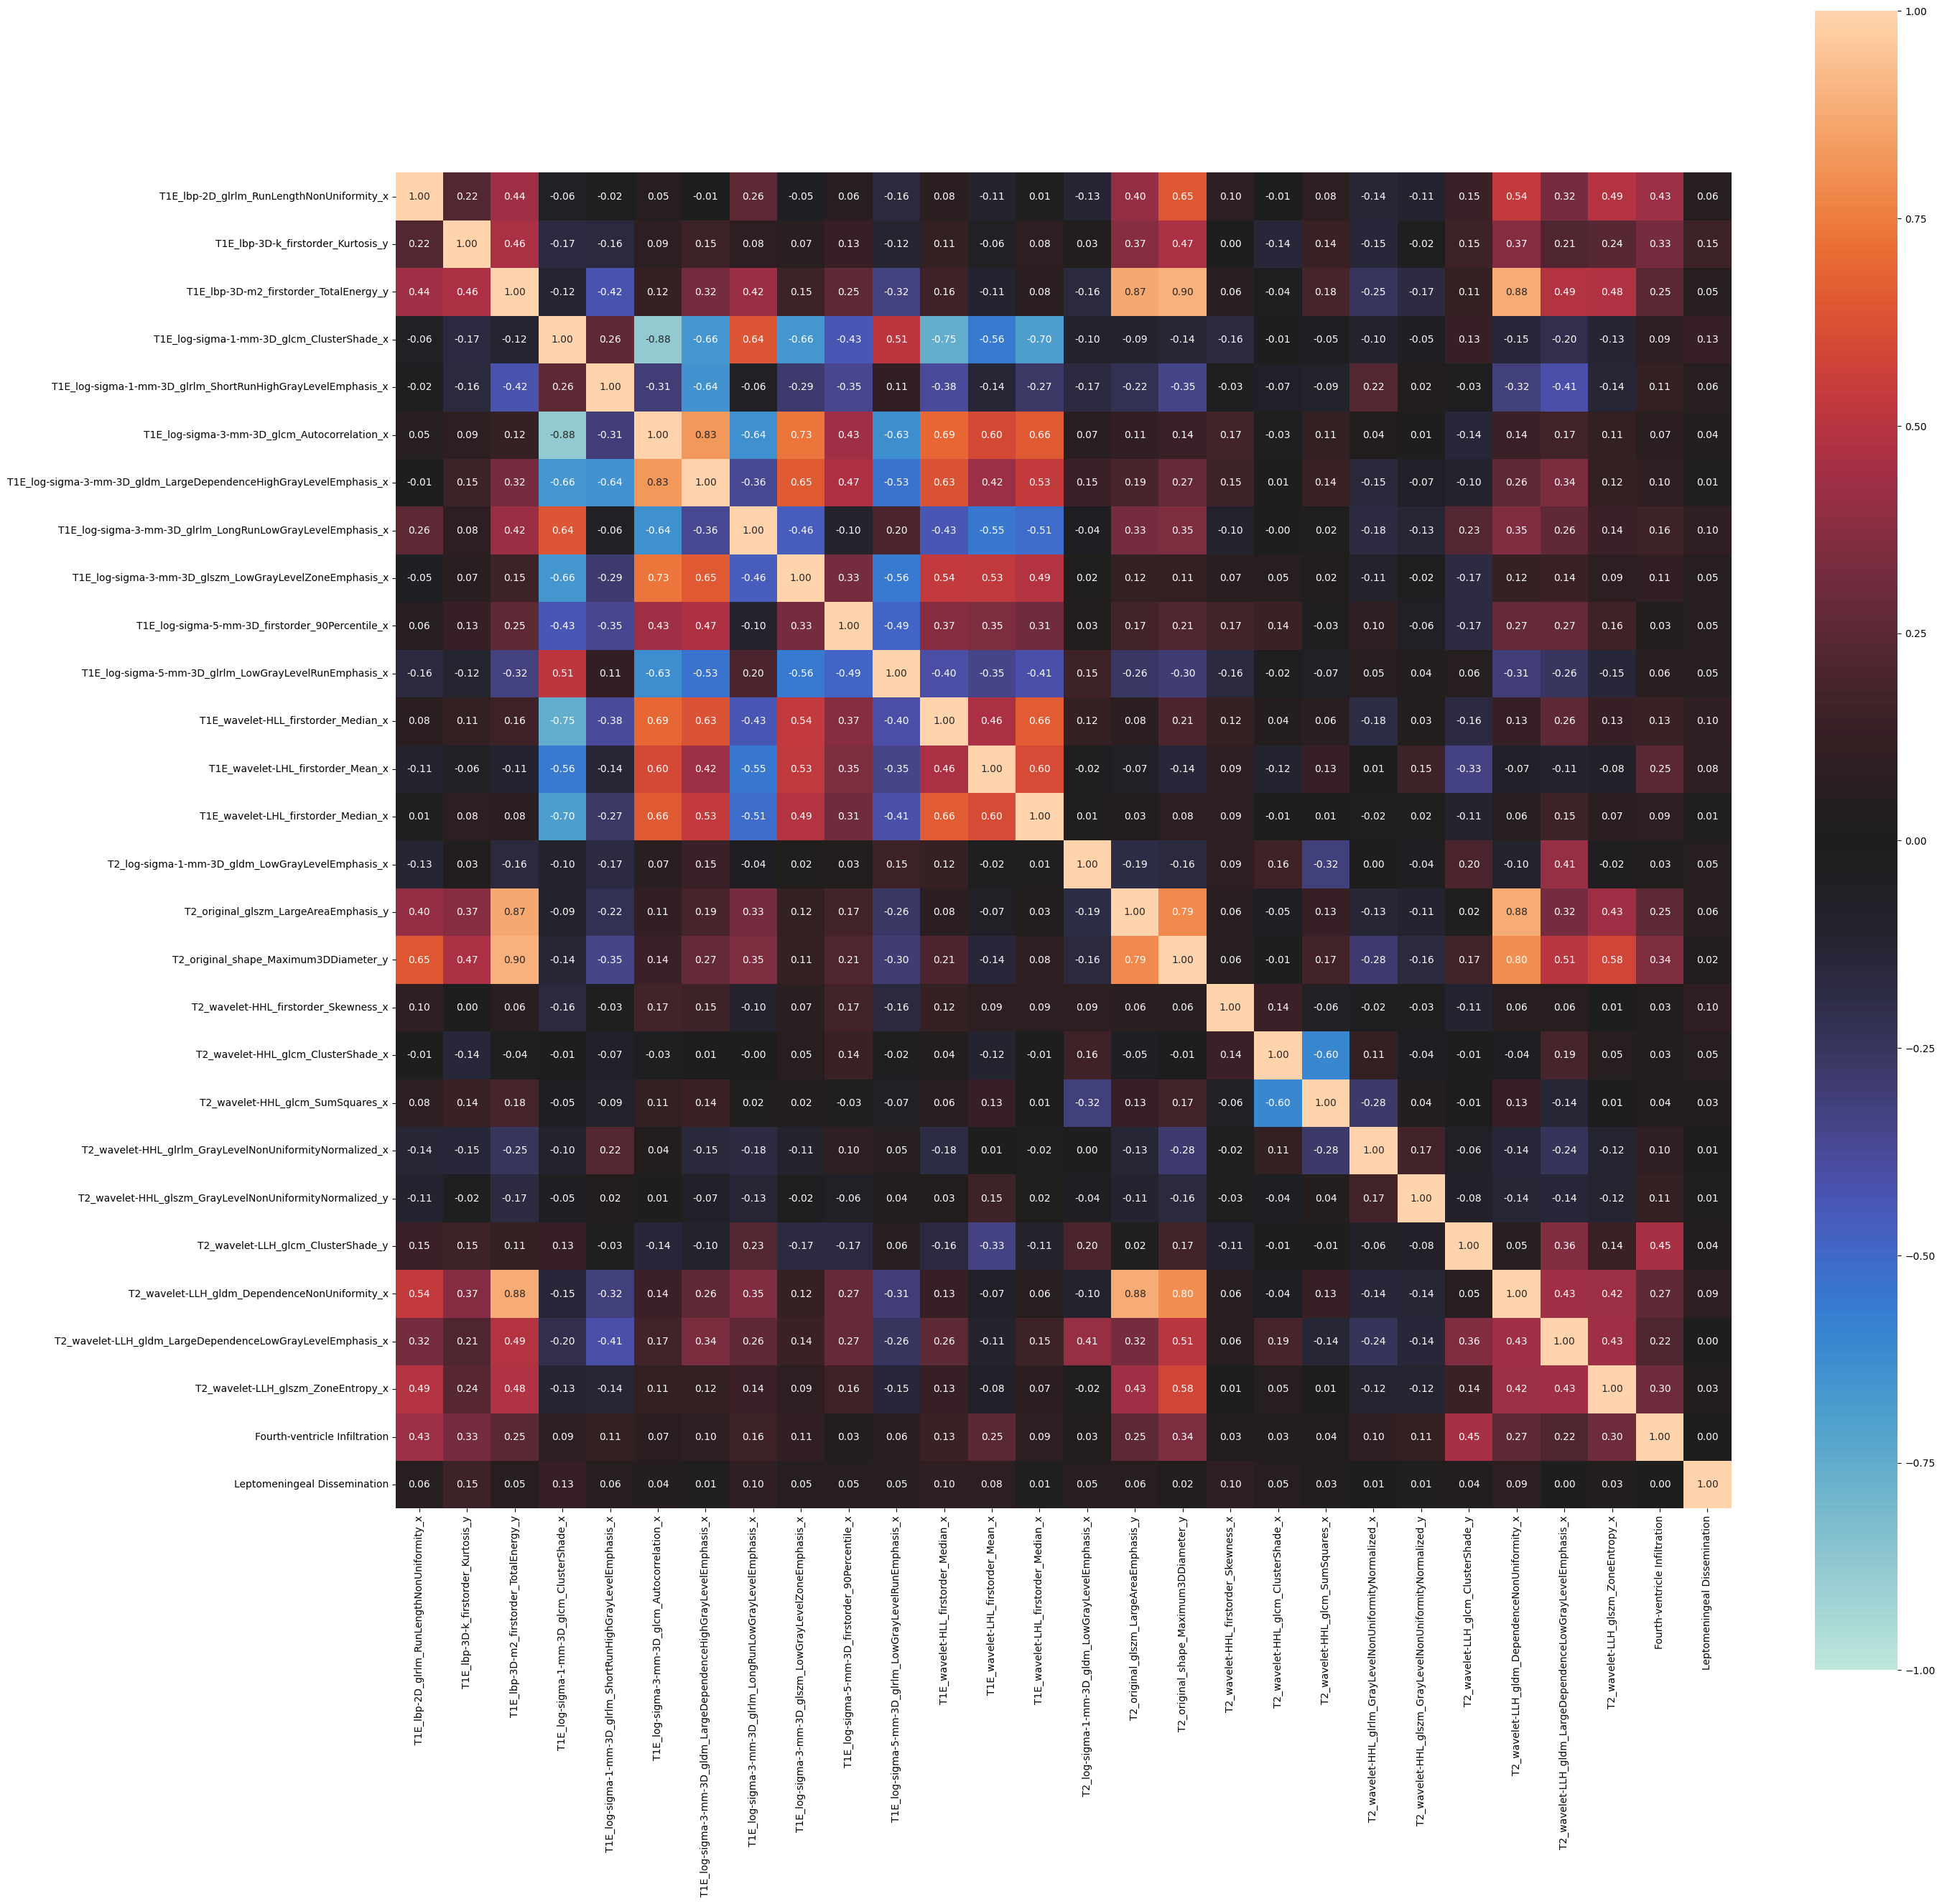

In [113]:
correlation_matrix = associations(interested_data, nominal_columns=['Fourth-ventricle Infiltration', 'Leptomeningeal Dissemination'],compute_only = False, figsize=(30, 30))

In [12]:
category_data = data[['Moledular', 'Sex' ,'Histological Subtypes', 'Hydrocephalus before Surgery', 'Tumor Texture', 'Fourth-ventricle Infiltration', 'TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）', 'Leptomeningeal Dissemination']]

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
category_data

,Moledular,Sex,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
1,G4,M,DN,Y,Mixed,Y,NTR,N
2,1,M,NaN,Y,Soft,Y,GTR,N
3,SHH,M,DN,N,Mixed,N,GTR,N
4,G4,F,Classic,Y,Mixed,Y,NTR,N
5,SHH,F,Classic,Y,NaN,N,GTR,N
6,1,M,NaN,Y,Hard,Y,GTR,N
7,G3,M,Classic,Y,Soft,Y,GTR,Y
8,WNT,F,Classic,Y,Soft,Y,NTR,N
9,G3,M,Classic,Y,Soft,Y,NTR,N
10,G3,M,NaN,Y,Soft,Y,NTR,N


In [14]:
category_data = category_data.dropna()

In [15]:
category_data

,Moledular,Sex,Histological Subtypes,Hydrocephalus before Surgery,Tumor Texture,Fourth-ventricle Infiltration,TumorResection（天坛-MRI和病例一起看过；cohort2-仅病例；cohort3为病例）,Leptomeningeal Dissemination
1,G4,M,DN,Y,Mixed,Y,NTR,N
3,SHH,M,DN,N,Mixed,N,GTR,N
4,G4,F,Classic,Y,Mixed,Y,NTR,N
7,G3,M,Classic,Y,Soft,Y,GTR,Y
8,WNT,F,Classic,Y,Soft,Y,NTR,N
9,G3,M,Classic,Y,Soft,Y,NTR,N
12,SHH,M,DN,Y,Mixed,Y,GTR,N
13,SHH,M,DN,Y,Mixed,N,GTR,N
17,WNT,F,Classic,Y,Soft,Y,GTR,N
18,G4,F,DN,Y,Soft,Y,GTR,N


/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.draw()
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22363 (\N{CJK UNIFIED IDEOGRAPH-575B}) missing from current font.
  fig.canvas.draw()
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.draw()
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from current font.
  fig.canvas.draw()
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py

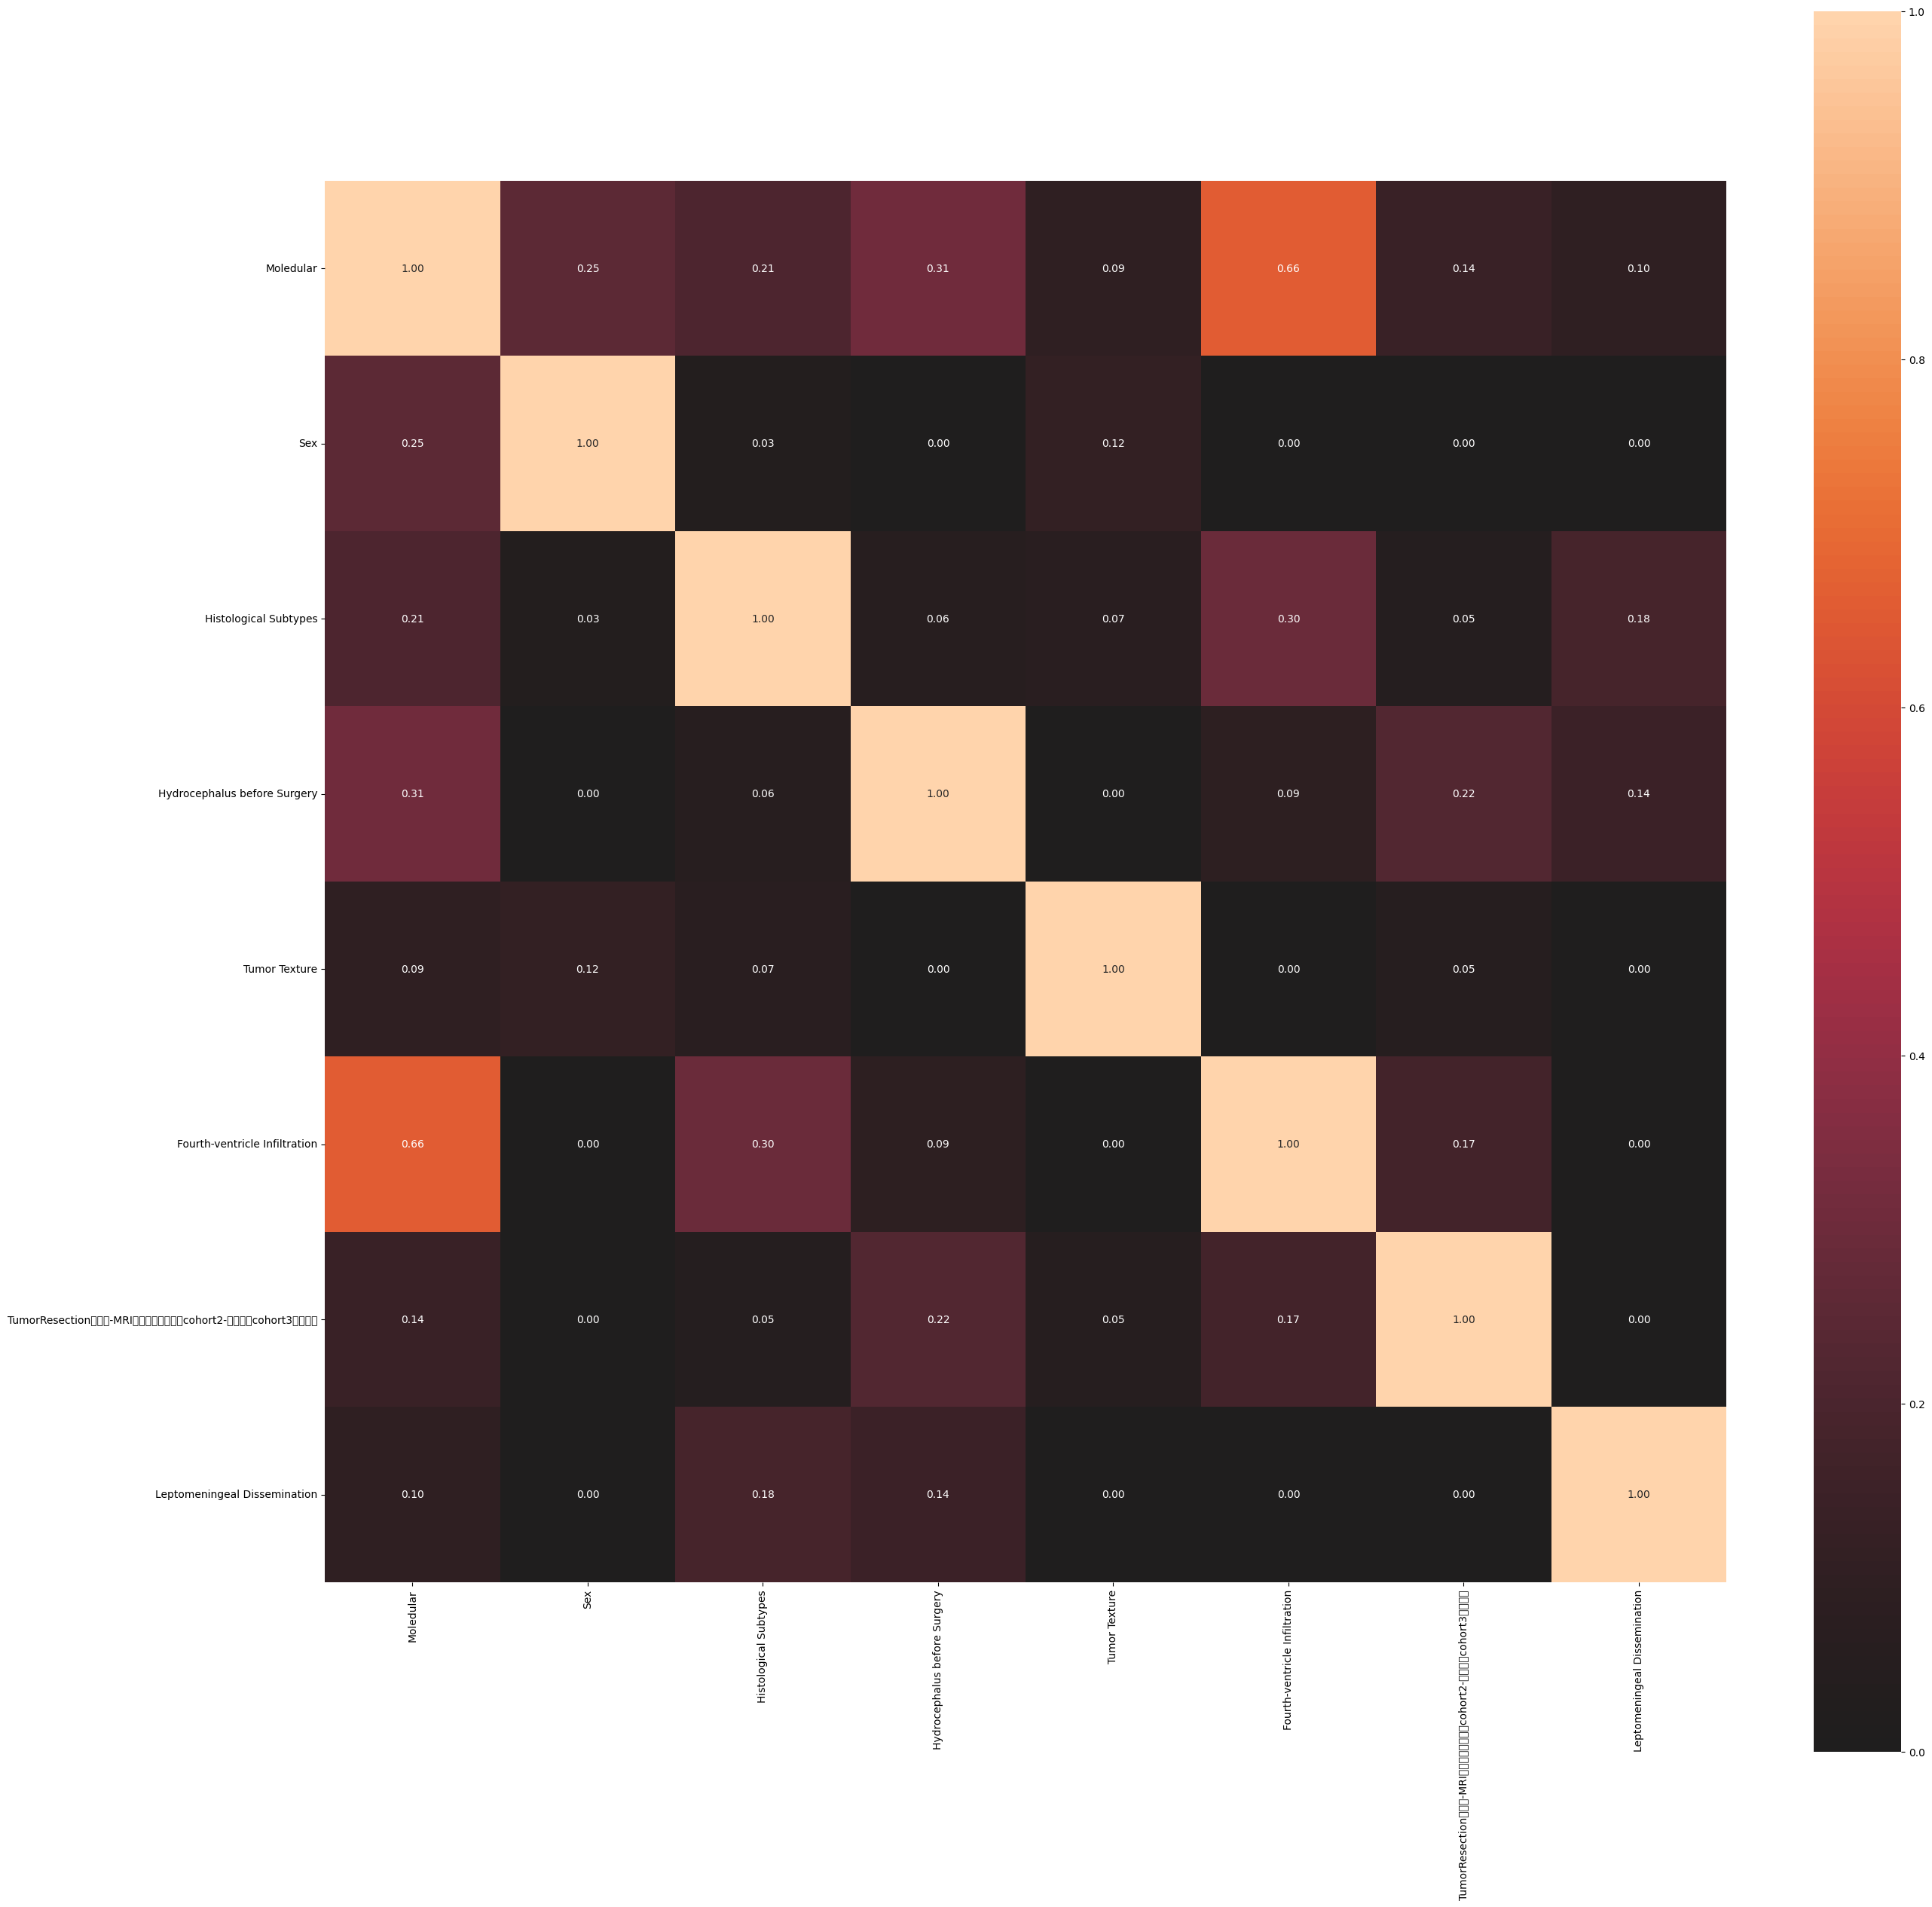

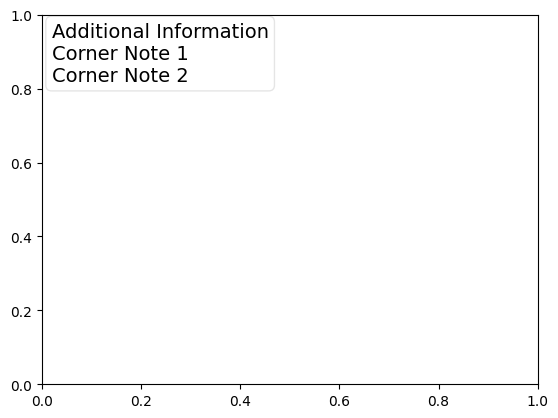

In [42]:
category_correlation_heatmap = associations(category_data,compute_only=False, figsize=(30,30))
corner_text = "Additional Information\nCorner Note 1\nCorner Note 2"
plt.text(0.02, 0.98, corner_text, transform=plt.gca().transAxes, fontsize=14, va='top', ha='left',
         bbox=dict(boxstyle="round", alpha=0.1, facecolor='white'))

# Show the heatmap
plt.show()

In [39]:
category_correlation_matrix, _ = associations(category_data, compute_only = True)

In [40]:
category_correlation_df = pd.DataFrame(category_correlation_matrix, columns=category_data.columns, index=category_data.columns)